# Import necessary dependencies and settings

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

# Threshold based methods

## Limiting features in bag of word based models

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.1, max_df=0.85, max_features=2000)
cv

CountVectorizer(max_df=0.85, max_features=2000, min_df=0.1)

In [28]:
# Create a list of text documents
text = ["I love dogs and love cats.", "I hate cats.", "Dogs are better than cats."]

# Fit and transform the text data
X = cv.fit_transform(text)

# Print the feature names (tokens)
print(cv.get_feature_names_out())

# Print the document-term matrix
print(X.toarray())


['and' 'are' 'better' 'dogs' 'hate' 'love' 'than']
[[1 0 0 1 0 2 0]
 [0 0 0 0 1 0 0]
 [0 1 1 1 0 0 1]]


## Variance based thresholding

In [3]:
df = pd.read_csv('datasets/Pokemon.csv')
poke_gen = pd.get_dummies(df['Generation'])
poke_gen.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False


In [29]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.15)
vt.fit_transform(poke_gen)

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [35]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Create a toy dataset with 4 features and 6 samples
X = np.array([[0, 1, 0, 1],
              [0, 1, 0, 0],
              [1, 0, 0, 1],
              [0, 1, 1, 1],
              [0, 0, 0, 0],
              [0, 1, 1, 0]])

# Create an instance of VarianceThreshold with a threshold of 0.15
sel = VarianceThreshold(threshold=0.15)

# Fit and transform the dataset
X_new = sel.fit_transform(X)

# Print the transformed dataset
print(X_new)

[[1 0 1]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [0 0 0]
 [1 1 0]]


In [5]:
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=poke_gen.columns).T

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
variance,0.164444,0.114944,0.16,0.128373,0.163711,0.091994
select_feature,True,False,True,False,True,False


In [6]:
poke_gen_subset = poke_gen.iloc[:,vt.get_support()].head()
poke_gen_subset

,Gen 1,Gen 3,Gen 5
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


# Statistical Methods

In [7]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

# build featureset and response class labels 
bc_X = np.array(bc_features)
bc_y = np.array(bc_classes).T[0]
print('Feature set shape:', bc_X.shape)
print('Response class shape:', bc_y.shape)

Feature set shape: (569, 30)
Response class shape: (569,)


In [8]:
np.set_printoptions(threshold=30)
print('Feature set data [shape: '+str(bc_X.shape)+']')
print(np.round(bc_X, 2), '\n')
print('Feature names:')
print(np.array(bc_features.columns), '\n')
print('Predictor Class label data [shape: '+str(bc_y.shape)+']')
print(bc_y, '\n')
print('Predictor name:', np.array(bc_classes.columns))
np.set_printoptions(threshold=pt)

Feature set data [shape: (569, 30)]
[[ 17.99  10.38 122.8  ...   0.27   0.46   0.12]
 [ 20.57  17.77 132.9  ...   0.19   0.28   0.09]
 [ 19.69  21.25 130.   ...   0.24   0.36   0.09]
 ...
 [ 16.6   28.08 108.3  ...   0.14   0.22   0.08]
 [ 20.6   29.33 140.1  ...   0.26   0.41   0.12]
 [  7.76  24.54  47.92 ...   0.     0.29   0.07]] 

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Predictor Class label data [shape: (569,)]
[0 0 0 ... 0 0 1] 

Predictor name: ['IsMaligna

In [9]:
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k=15)
skb.fit(bc_X, bc_y)

SelectKBest(k=15, score_func=<function chi2 at 0x0000016C32B33A60>)

### sklearn.feature_selection.chi2:
- Compute chi-squared stats between each non-negative feature and class.

In [46]:
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

[('worst area', 112598.4315640537),
 ('mean area', 53991.65592375091),
 ('area error', 8758.504705334486),
 ('worst perimeter', 3665.035416340581),
 ('mean perimeter', 2011.1028637679128),
 ('worst radius', 491.68915743332025),
 ('mean radius', 266.1049171951782),
 ('perimeter error', 250.57189635982178),
 ('worst texture', 174.4493996057095),
 ('mean texture', 93.89750809863374)]

In [44]:
sorted(feature_scores, key=lambda x: x[1], reverse=True)[:10]

[('worst area', 112598.4315640537),
 ('mean area', 53991.65592375091),
 ('area error', 8758.504705334486),
 ('worst perimeter', 3665.035416340581),
 ('mean perimeter', 2011.1028637679128),
 ('worst radius', 491.68915743332025),
 ('mean radius', 266.1049171951782),
 ('perimeter error', 250.57189635982178),
 ('worst texture', 174.4493996057095),
 ('mean texture', 93.89750809863374)]

In [47]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
bc_X_minmax = mms.fit_transform(bc_X)
print(np.round(bc_X_minmax, 2), '\n')

[[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]] 



In [48]:
skb = SelectKBest(score_func=chi2, k=15)
skb.fit(bc_X, bc_y)
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

[('worst area', 112598.4315640537),
 ('mean area', 53991.65592375091),
 ('area error', 8758.504705334486),
 ('worst perimeter', 3665.035416340581),
 ('mean perimeter', 2011.1028637679128),
 ('worst radius', 491.68915743332025),
 ('mean radius', 266.1049171951782),
 ('perimeter error', 250.57189635982178),
 ('worst texture', 174.4493996057095),
 ('mean texture', 93.89750809863374)]

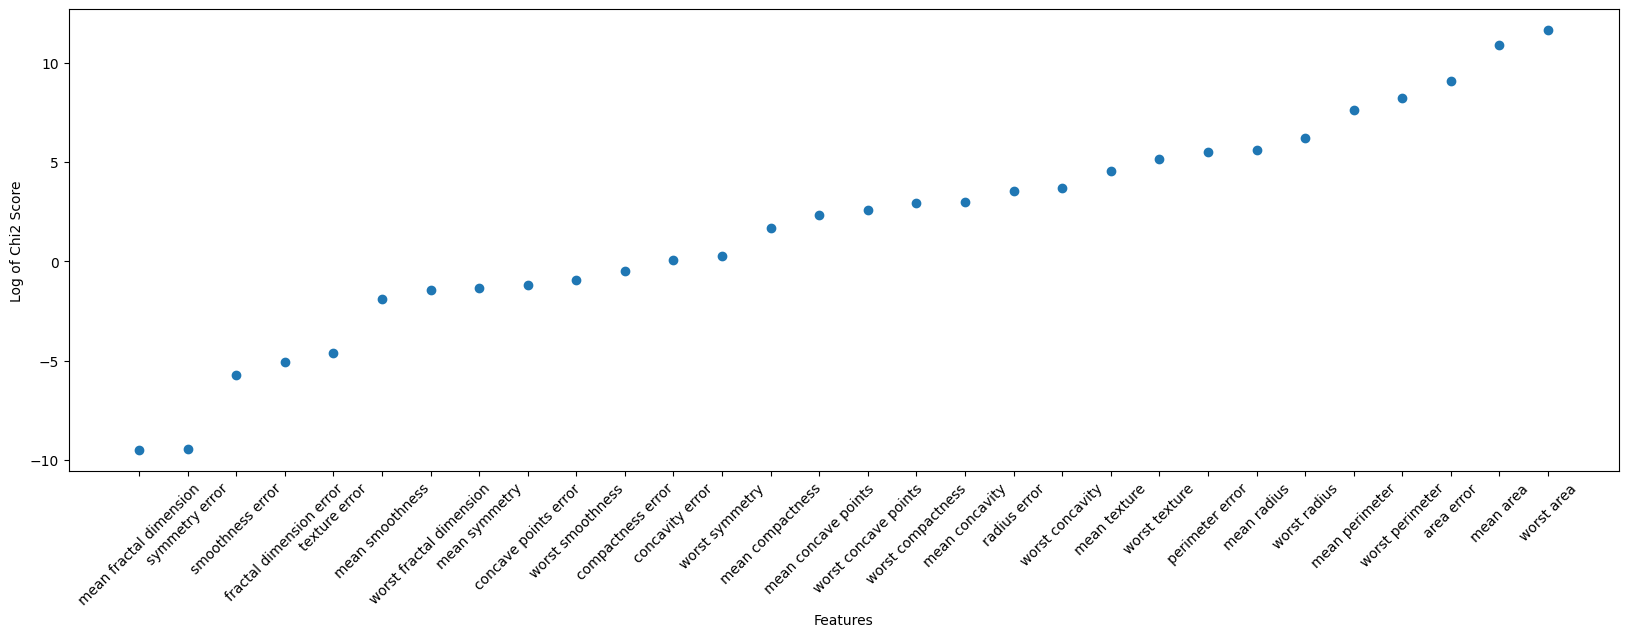

In [58]:
import matplotlib.pyplot as plt

feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1])

x_values = [item[0] for item in feature_scores_sorted]
y_values = [item[1] for item in feature_scores_sorted]

plt.figure(figsize=(20, 6))

plt.scatter(x_values, np.log(y_values))

plt.xlabel('Features')
plt.ylabel('Log of Chi2 Score')
plt.xticks(rotation=45)
plt.show()

In [11]:
select_features_kbest = skb.get_support()
feature_names_kbest = bc_data.feature_names[select_features_kbest]
feature_subset_df = bc_features[feature_names_kbest]
bc_SX = np.array(feature_subset_df)
print(bc_SX.shape)
print(feature_names_kbest)

(569, 15)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concavity' 'radius error' 'perimeter error' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points']


In [12]:
np.round(feature_subset_df.iloc[20:25], 2)

,mean radius,mean texture,mean perimeter,mean area,mean concavity,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
20,13.08,15.71,85.63,520.0,0.05,0.19,1.38,14.67,14.50,20.49,96.09,630.5,0.28,0.19,0.07
21,9.50,12.44,60.34,273.9,0.03,0.28,1.91,15.70,10.23,15.66,65.13,314.9,0.11,0.09,0.06
22,15.34,14.26,102.50,704.4,0.21,0.44,3.38,44.91,18.07,19.08,125.10,980.9,0.60,0.63,0.24
23,21.16,23.04,137.20,1404.0,0.11,0.69,4.30,93.99,29.17,35.59,188.00,2615.0,0.26,0.32,0.20
24,16.65,21.38,110.00,904.6,0.15,0.81,5.46,102.60,26.46,31.56,177.00,2215.0,0.36,0.47,0.21


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# build logistic regression model
lr = LogisticRegression(max_iter=10000)

# evaluating accuracy for model built on full featureset
full_feat_acc = np.average(cross_val_score(lr, bc_X, bc_y, scoring='accuracy', cv=5))
# evaluating accuracy for model built on selected featureset
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with complete feature set', bc_X.shape, ':', full_feat_acc)
print('Model accuracy with selected feature set', bc_SX.shape, ':', sel_feat_acc)

Model accuracy statistics with 5-fold cross validation
Model accuracy with complete feature set (569, 30) : 0.9525694767893184
Model accuracy with selected feature set (569, 15) : 0.9490451793199813


# Recursive Feature Elimination

In [63]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=5000)
rfe = RFE(estimator=lr, n_features_to_select=15, step=1)
rfe.fit(bc_X, bc_y)

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=15)

In [64]:
select_features_rfe = rfe.get_support()
feature_names_rfe = bc_data.feature_names[select_features_rfe]
print(feature_names_rfe)

['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'texture error' 'perimeter error'
 'worst radius' 'worst texture' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']


In [65]:
set(feature_names_kbest) & set(feature_names_rfe)

{'mean concavity',
 'mean radius',
 'perimeter error',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst radius',
 'worst texture'}

# Model based selection

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(bc_X, bc_y)

RandomForestClassifier()

In [67]:
importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(bc_data.feature_names, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

[('worst perimeter', 0.1454923982300038),
 ('worst concave points', 0.1256688779135669),
 ('worst area', 0.1042843549188343),
 ('mean concave points', 0.08177514822636496),
 ('mean radius', 0.07280736661116254),
 ('mean concavity', 0.06843728255274797),
 ('worst radius', 0.0664248363443258),
 ('mean area', 0.06584208547658776),
 ('mean perimeter', 0.04213644523686101),
 ('area error', 0.03938015425095391)]

# Feature extraction using dimensionality reduction

In [68]:
# center the feature set
bc_XC = bc_X - bc_X.mean(axis=0)

# decompose using SVD
U, S, VT = np.linalg.svd(bc_XC)

# get principal components
PC = VT.T

# get first 3 principal components
PC3 = PC[:, 0:3]
PC3.shape

(30, 3)

In [69]:
# reduce feature set dimensionality 
np.round(bc_XC.dot(PC3), 2)

array([[-1160.14,  -293.92,   -48.58],
       [-1269.12,    15.63,    35.39],
       [ -995.79,    39.16,     1.71],
       ...,
       [ -314.5 ,    47.55,    10.44],
       [-1124.86,    34.13,    19.74],
       [  771.53,   -88.64,   -23.89]])

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bc_X)

PCA(n_components=3)

In [71]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

In [72]:
bc_pca = pca.transform(bc_X)
np.round(bc_pca, 2)

array([[1160.14, -293.92,   48.58],
       [1269.12,   15.63,  -35.39],
       [ 995.79,   39.16,   -1.71],
       ...,
       [ 314.5 ,   47.55,  -10.44],
       [1124.86,   34.13,  -19.74],
       [-771.53,  -88.64,   23.89]])

In [86]:
np.average(cross_val_score(lr, bc_pca, bc_y, scoring='accuracy', cv=5))

0.9262071106970968